# Лабораторная №4
Сети с радиальными базисными элементами

*Вариант* № 17

Красоткин Семён (М80-408Б-19)

## Цель работы

Исследование свойств некоторых видов сетей с радиальными базисными элементами,  алгоритмов обучения, а также применение сетей в задачах классификации и
аппроксимации функции.

## Код

In [13]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools

from keras import backend
from keras.layers import *
from sklearn.model_selection import train_test_split

RBF

In [3]:
class RBFLayer(keras.layers.Layer):
    def __init__(self, output_dim, mu_init = tf.keras.initializers.RandomUniform(minval = -1, maxval = 1),**kwargs):
        self.output_dim = output_dim
        self.mu_init = mu_init
        super(RBFLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.mu = self.add_weight(name = "mu",
                                  shape = (input_shape[1], self.output_dim),
                                  initializer = self.mu_init,
                                  trainable = True)
        self.sigma = self.add_weight(name = "sigma",
                                     shape = (self.output_dim,),
                                     initializer = "random_normal",
                                     trainable = True)
        super(RBFLayer, self).build(input_shape)
    
    def call(self, inputs):
        diff = backend.expand_dims(inputs) - self.mu
        output = backend.exp(backend.sum(diff ** 2, axis = 1) * self.sigma)
        return output

### Классификация

In [4]:
# Уравнение эллипса в параметрическом виде.
def ellipse(t, a, b, x0, y0):
    x = x0 + a * np.cos(t)
    y = y0 + b * np.sin(t)
    return x, y

# Уравнение параболы в параметрическом виде.
def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y

# Функция вращения фигуры на заданный угол.
def rotate(x, y, alpha):
    xr = x * np.cos(alpha) - y * np.sin(alpha)
    yr = x * np.sin(alpha) + y * np.cos(alpha)
    return xr, yr

In [5]:
# Эллипс
a1 = 0.4 
b1 = 0.15
alpha1 = np.pi / 6
x01 = 0.1
y01 = -0.15

# Эллипс
a2 = 0.7
b2 = 0.5
alpha2 = np.pi / 3
x02 = 0
y02 = 0

# Парабола
p = 1
alpha3 = np.pi / 2
x03 = -0.8
y03 = 0

In [6]:
t = np.arange(0, 2 * np.pi, 0.025)

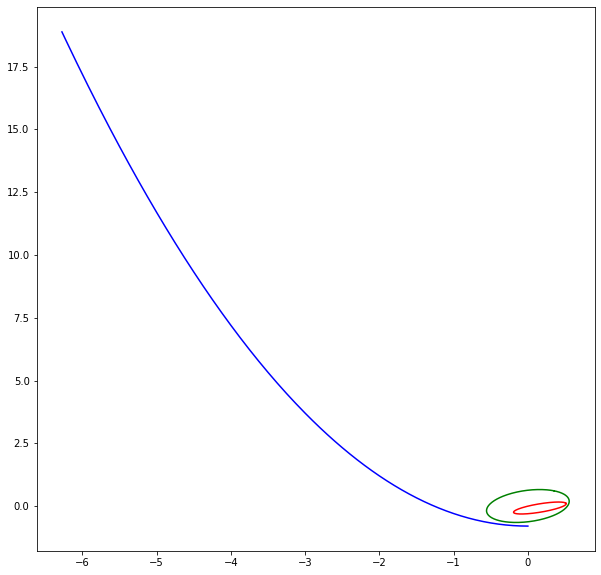

In [7]:
fig1x, fig1y = ellipse(t, a1, b1, x01, y01)
fig1x, fig1y = rotate(fig1x, fig1y, alpha1)

fig2x, fig2y = ellipse(t, a2, b2, x02, y02)
fig2x, fig2y = rotate(fig2x, fig2y, alpha2)

fig3x, fig3y = parabola(t, p, x03, y03)

fig3x, fig3y = rotate(fig3x, fig3y, alpha3)

figure = plt.figure(figsize = (10, 10))

plt.plot(fig1x, fig1y, c = 'r')
plt.plot(fig2x, fig2y, c = 'g')
plt.plot(fig3x, fig3y, c = 'b')
plt.show()

In [10]:
datax = np.concatenate((fig1x, fig2x, fig3x), axis=0)
datay = np.concatenate((fig1y, fig2y, fig3y), axis=0)


data = np.array([datax, datay])

l1 = [[1, 0, 0] for _ in range(len(fig1x))]
l2 = [[0, 1, 0] for _ in range(len(fig2x))]
l3 = [[0, 0, 1] for _ in range(len(fig3x))]

labels = np.array(l1 + l2 + l3)

data = data.transpose()

train, test, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 10,shuffle = True)

In [27]:
model = keras.models.Sequential()

model.add(RBFLayer(3, input_dim = 2))
model.add(Dense(3, activation = "sigmoid"))

model.compile(tf.keras.optimizers.Adam(learning_rate = 1e-3), 'mse', ['accuracy'])

hist = model.fit(train, train_labels, batch_size = 1, epochs = 200)

Epoch 1/200
604/604 [==============================] - 2s 2ms/step - loss: 0.2949 - accuracy: 0.4106
Epoch 2/200
604/604 [==============================] - 2s 3ms/step - loss: 0.2100 - accuracy: 0.5215
Epoch 3/200
604/604 [==============================] - 2s 3ms/step - loss: 0.1971 - accuracy: 0.5596
Epoch 4/200
604/604 [==============================] - 2s 3ms/step - loss: 0.1896 - accuracy: 0.5993
Epoch 5/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1824 - accuracy: 0.6109
Epoch 6/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1750 - accuracy: 0.6109
Epoch 7/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1682 - accuracy: 0.6374
Epoch 8/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1621 - accuracy: 0.6772
Epoch 9/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1566 - accuracy: 0.6457
Epoch 10/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1519 - accura

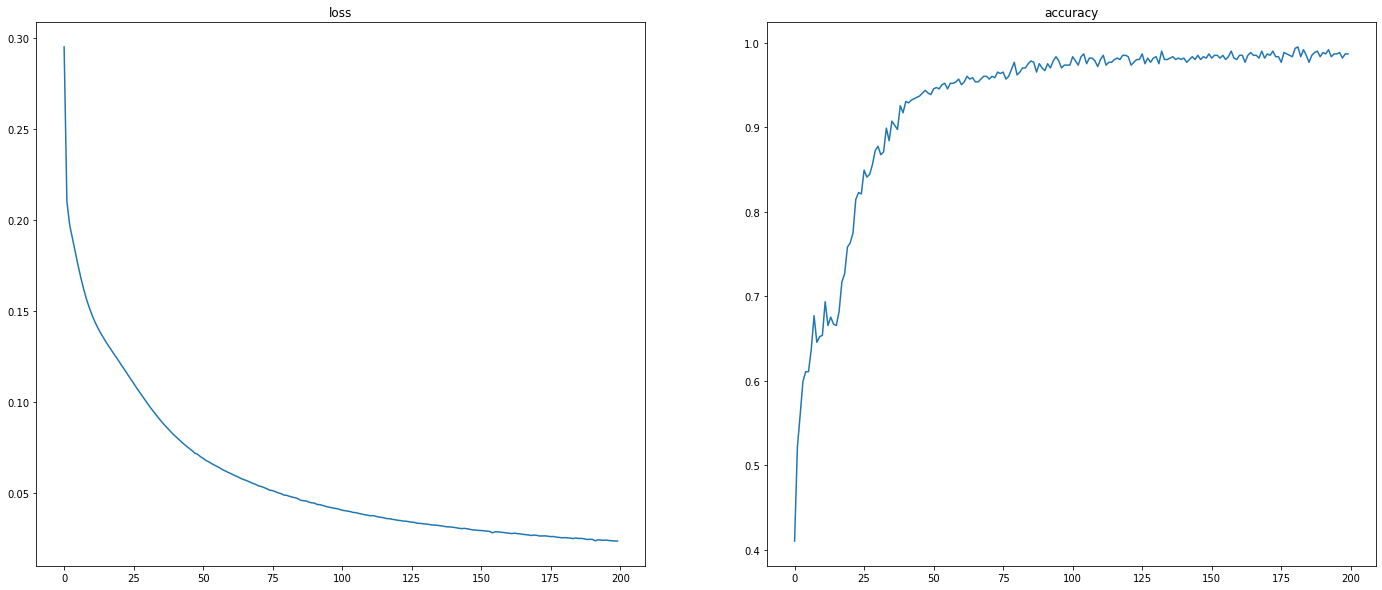

In [28]:
figure = plt.figure(figsize = (24, 10))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


figure.add_subplot(1, 2, 1)
plt.title("loss")
plt.plot(histx, hist.history['loss'])

figure.add_subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(histx, hist.history['accuracy'])

plt.show()

1250/1250 [==============================] - 2s 1ms/step


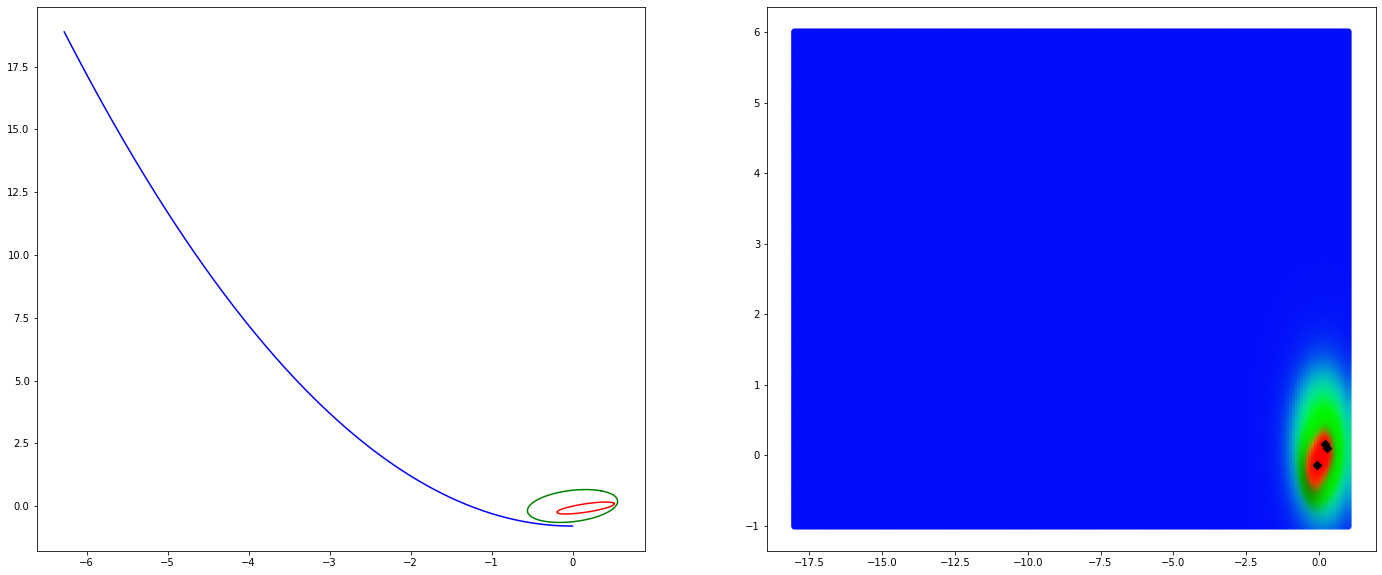

In [29]:
x = np.linspace(-18, 1, 200)
y = np.linspace(-1, 6, 200)

figure = plt.figure(figsize = (24, 10))

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.plot(fig1x, fig1y, c = 'r')
ax1.plot(fig2x, fig2y, c = 'g')
ax1.plot(fig3x, fig3y, c = 'b')

data = np.array(list(itertools.product(x, y)))

xy = data.transpose()

pred = model.predict(data)


ax2.scatter(xy[0], xy[1], c = pred)
mu = model.get_layer(index = 0).get_weights()[0]
plt.scatter(mu[0], mu[1], color = "black", marker = "D")

plt.show()

### Апроксимация

In [15]:
f = lambda t: np.cos(-5*t**2 + 10*t - 5)
t = np.arange(0, 2.5, 0.01)
ft = f(t)

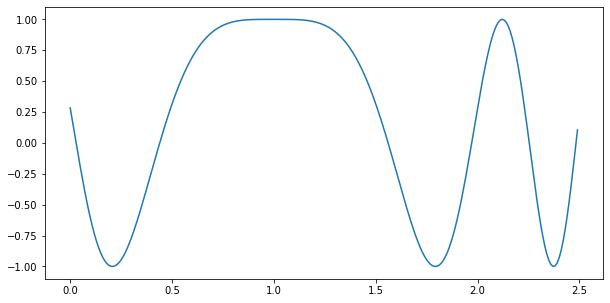

In [16]:
t = np.arange(0, 2.5, 0.01)
ft = f(t)

figure = plt.figure(figsize = (10, 5))

plt.plot(t, ft)
plt.show()

In [32]:
model = keras.models.Sequential()

model.add(RBFLayer(32, input_dim = 1, mu_init=keras.initializers.RandomUniform(minval = 0, maxval = 2.5)))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation = "linear"))

model.compile(tf.keras.optimizers.RMSprop(0.003), 'mse')

hist = model.fit(t, ft, batch_size = 1, epochs = 1000, shuffle = True)

Epoch 1/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.5801
Epoch 2/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4698
Epoch 3/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4383
Epoch 4/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3936
Epoch 5/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 6/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.2505
Epoch 7/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.2198
Epoch 8/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.2068
Epoch 9/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1694
Epoch 10/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1196
Epoch 11/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 12/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0560
E

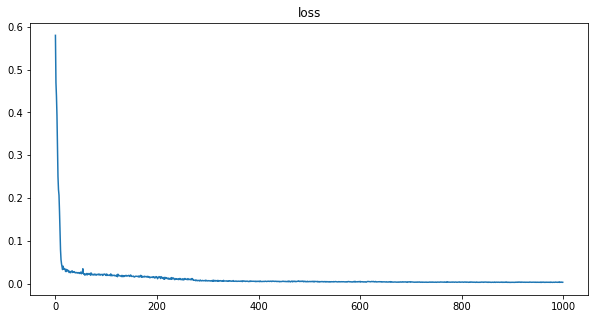

In [33]:
figure = plt.figure(figsize = (10, 5))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


plt.plot(histx, hist.history['loss'])
plt.title("loss")
plt.show()

1/1 [==============================] - 0s 17ms/step


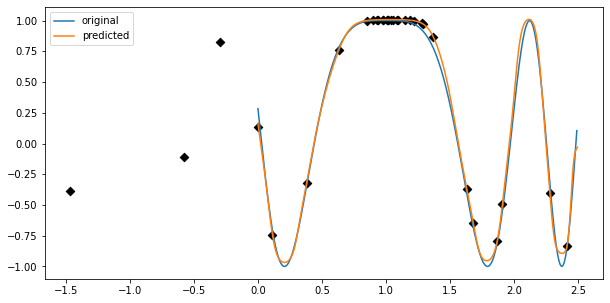

In [34]:
t2 = np.arange(0, 2.5, 0.005)

pred = model.predict(t2)

figure = plt.figure(figsize = (10, 5))

plt.plot(t, ft, label = 'original')
plt.plot(t2, pred, label = 'predicted')
mu = model.get_layer(index = 0).get_weights()[0][0]
plt.scatter(mu, model.predict(mu), color = "black", marker = "D")
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


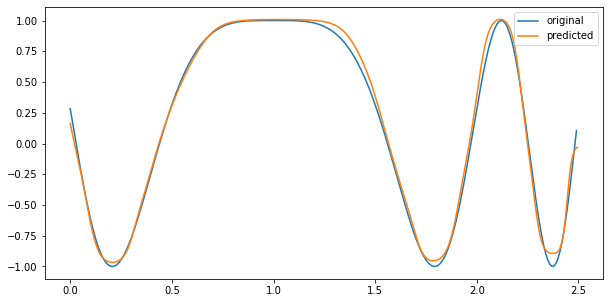

In [35]:
t2 = np.arange(0, 2.5, 0.005)

pred = model.predict(t2)

figure = plt.figure(figsize = (10, 5))

plt.plot(t, ft, label = 'original')
plt.plot(t2, pred, label = 'predicted')
plt.legend()
plt.show()

## Выводы
Ознакомился с многослойными нейронными сетями со слоями с радиальными базисными элементами. Реализовал две многослойные модели для решения задач классификации и апроксимации.